# Notebook for testing transition probability functions with a two-state model
#### Brandon Chan | January 2021

Notebook to load and run a single model arm with two states, then plot the movement between states. This is good to test the behavior or parameters of a time-dependend transition probaility. I.e. should produce a shape/curve that is similar to an extracted literature curve or survival analysis output. 

### Import packages

In [2]:
import numpy as np # Scientific computing - used for n-dimensional arrays, numerical functions
import math
from scipy import stats
import pandas as pd # Dataframe structure and reading of excel files
import matplotlib.pyplot as plt # Plotting package
import seaborn as sns # Another plotting package
import os # for file path things
from time import perf_counter, strftime

import sys
sys.path.insert(0,"../src")
from markov_modeling import *

### Read in model specifications from excel doc

In [3]:
model_specification = ModelSpec('../model_specifications/test_parameters_td.xlsx', 
                                model_name='test_base')

### Checking out specifications of the model

In [4]:
model_specification.structure

,start_state,end_state,type,parameter_1,parameter_2,parameter_3,parameter_4,notes
0,treatment,treatment,residual,NaN,NaN,NaN,NaN,NaN
1,treatment,death,time_dependent_weibull,-2.594101,0.60891,NaN,NaN,NaN
2,death,death,constant,1.000000,NaN,NaN,NaN,NaN


In [5]:
model_specification.simulation_parameters

,1
0,
max_iterations,1000
time_horizon,15
cycle_length,30
discount_rate,0.015
name_start_state,treatment


### Example of manually changing parameters in a loaded specification in-code
<b>Note:</b> Does not save change in the actual spreadsheet. Just a quick way of testing parameter changes or correcting things.

In [9]:
model_specification.structure.loc[1, 'parameter_1'] = -2.80079
model_specification.structure.loc[1, 'parameter_2'] = 0.775691
model_specification.structure

,start_state,end_state,type,parameter_1,parameter_2,parameter_3,parameter_4,notes
0,treatment,treatment,residual,NaN,NaN,NaN,NaN,NaN
1,treatment,death,time_dependent_weibull,-2.80079,0.775691,NaN,NaN,NaN
2,death,death,constant,1.00000,NaN,NaN,NaN,NaN


### Run model

In [10]:
pop_base = run_model(model_specification)
cost_base = calculate_costs(pop_base, model_specification)
util_base = calculate_utilities(pop_base, model_specification)

beginning iterations...
model done...
total time: 6.58 seconds || mean time per iteration: 0.01 seconds


### Plot population movement over the time horizon to validate behavior (for 1 iteration)

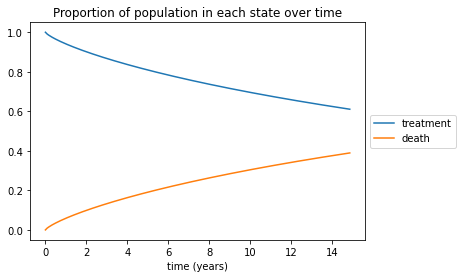

In [11]:
df = pd.DataFrame(data=pop_base[0,:,:].transpose(), columns=model_specification.state_mapping)
df = df.reset_index().rename(columns={'index': 'time'})
df.loc[:,'time'] = df.time.apply(lambda x: (x*model_specification.cycle_length)/365)
df.set_index('time').plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('time (years)')
plt.title('Proportion of population in each state over time')
plt.show()
plt.show()

# To do for future development:

### Diagnosis of probabilistic changes over iteratrions
Look at variation in proportion of population at each time step?